In [1]:
import numpy as np
import pandas as pd

flights_2023 = pd.read_csv("BITRE_OTP_2022-23_Master(Sheet1).csv")

In [2]:
flights_2023.head()

,Route,Departing Port,Arriving Port,Airline,Year,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
0,Adelaide-Alice Springs,Adelaide,Alice Springs,All Airlines,2022-23,678,676,2,576,513,100,163,85.207101,75.887574,0.294985
1,Adelaide-Alice Springs,Adelaide,Alice Springs,Qantas,2022-23,20,19,1,19,18,0,1,100.000000,94.736842,5.000000
2,Adelaide-Alice Springs,Adelaide,Alice Springs,QantasLink,2022-23,511,510,1,444,392,66,118,87.058824,76.862745,0.195695
3,Adelaide-Alice Springs,Adelaide,Alice Springs,Virgin Australia,2022-23,147,147,0,113,103,34,44,76.870748,70.068027,0.000000
4,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,2022-23,3563,3464,99,2382,2506,1082,958,68.764434,72.344111,2.778557


In [3]:
flights_2023.columns

Index(['Route', 'Departing Port', 'Arriving Port', 'Airline', 'Year',
       'Sectors Scheduled', 'Sectors Flown', 'Cancellations',
       'Departures On Time', 'Arrivals On Time', 'Departures Delayed',
       'Arrivals Delayed', 'OnTime Departures \n(%)', 'OnTime Arrivals \n(%)',
       'Cancellations \n\n(%)'],
      dtype='object')

# Pre-process the data

In [4]:
# Feature selection: Remove unneeded rows

flights_2023_preprocessed = flights_2023.copy()

In [5]:
flights_2023_preprocessed = flights_2023_preprocessed[["Departing Port", "Arriving Port", "Airline", 'OnTime Departures \n(%)', 'OnTime Arrivals \n(%)', 'Cancellations \n\n(%)']]

In [6]:
flights_2023_preprocessed

,Departing Port,Arriving Port,Airline,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
0,Adelaide,Alice Springs,All Airlines,85.207101,75.887574,0.294985
1,Adelaide,Alice Springs,Qantas,100.000000,94.736842,5.000000
2,Adelaide,Alice Springs,QantasLink,87.058824,76.862745,0.195695
3,Adelaide,Alice Springs,Virgin Australia,76.870748,70.068027,0.000000
4,Adelaide,Brisbane,All Airlines,68.764434,72.344111,2.778557
...,...,...,...,...,...,...
527,Townsville,Cairns,QantasLink,83.644017,85.808779,3.032070
528,Townsville,Cairns,Rex Airlines,90.751445,90.173410,4.945055
529,Wagga Wagga,Sydney,All Airlines,76.897690,74.793729,2.533172
530,Wagga Wagga,Sydney,QantasLink,77.685185,80.833333,2.614968


In [7]:
# Delete null values

flights_2023_preprocessed = flights_2023_preprocessed.dropna()

# Divide percentage column values by 100 to make them have a value range from 0-1

In [8]:
flights_2023_preprocessed[['OnTime Departures \n(%)', 'OnTime Arrivals \n(%)', 'Cancellations \n\n(%)']] /= 100

In [9]:
flights_2023_preprocessed

,Departing Port,Arriving Port,Airline,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
0,Adelaide,Alice Springs,All Airlines,0.852071,0.758876,0.002950
1,Adelaide,Alice Springs,Qantas,1.000000,0.947368,0.050000
2,Adelaide,Alice Springs,QantasLink,0.870588,0.768627,0.001957
3,Adelaide,Alice Springs,Virgin Australia,0.768707,0.700680,0.000000
4,Adelaide,Brisbane,All Airlines,0.687644,0.723441,0.027786
...,...,...,...,...,...,...
527,Townsville,Cairns,QantasLink,0.836440,0.858088,0.030321
528,Townsville,Cairns,Rex Airlines,0.907514,0.901734,0.049451
529,Wagga Wagga,Sydney,All Airlines,0.768977,0.747937,0.025332
530,Wagga Wagga,Sydney,QantasLink,0.776852,0.808333,0.026150


# Remove "All Airlines" columns

In [10]:
# Remove all "All Airlines" rows

flights_2023_preprocessed = flights_2023_preprocessed.loc[flights_2023_preprocessed["Airline"] != "All Airlines"]

# Convert categorical variables into numerical

In [11]:
flights_2023_preprocessed["Departing Port"] = flights_2023_preprocessed["Departing Port"].astype("category")
flights_2023_preprocessed["Arriving Port"] = flights_2023_preprocessed["Arriving Port"].astype("category")
flights_2023_preprocessed["Airline"] = flights_2023_preprocessed["Airline"].astype("category")

<ipython-input-11-52cdc488f2b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_2023_preprocessed["Departing Port"] = flights_2023_preprocessed["Departing Port"].astype("category")
<ipython-input-11-52cdc488f2b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_2023_preprocessed["Arriving Port"] = flights_2023_preprocessed["Arriving Port"].astype("category")
<ipython-input-11-52cdc488f2b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [12]:
flights_2023_preprocessed["Airline"].head()

1              Qantas
2          QantasLink
3    Virgin Australia
5             Jetstar
6              Qantas
Name: Airline, dtype: category
Categories (7, object): ['Jetstar', 'Qantas', 'QantasLink', 'Rex Airlines', 'Skytrans', 'Virgin Australia', 'Virgin Australia Regional Airlines']

# Data Encoding - Convert categorical variables to integer values

In [13]:
flights_2023_preprocessed["Arriving Port"].cat.codes

1       2
2       2
3       2
5       6
6       6
       ..
525     6
527     8
528     8
530    35
531    35
Length: 405, dtype: int8

In [14]:
flights_2023_categorical = flights_2023_preprocessed.copy()

# Source: https://stackoverflow.com/a/32011969
cat_columns = flights_2023_categorical.select_dtypes(['category']).columns
flights_2023_categorical[cat_columns] = flights_2023_categorical[cat_columns].apply(lambda x: x.cat.codes)

In [15]:
flights_2023_categorical

,Departing Port,Arriving Port,Airline,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
1,0,2,1,1.000000,0.947368,0.050000
2,0,2,2,0.870588,0.768627,0.001957
3,0,2,5,0.768707,0.700680,0.000000
5,0,6,0,0.689751,0.673130,0.067183
6,0,6,1,0.680761,0.765328,0.004211
...,...,...,...,...,...,...
525,37,6,5,0.628906,0.663411,0.031526
527,37,8,2,0.836440,0.858088,0.030321
528,37,8,3,0.907514,0.901734,0.049451
530,38,35,2,0.776852,0.808333,0.026150


# Data Analysis

## Univariate Analysis

In [16]:
import seaborn as sns

In [18]:
flights_2023_categorical["OnTime Departures \n(%)"].describe()

count    405.000000
mean       0.674219
std        0.111661
min        0.261759
25%        0.619181
50%        0.686275
75%        0.750000
max        1.000000
Name: OnTime Departures \n(%), dtype: float64

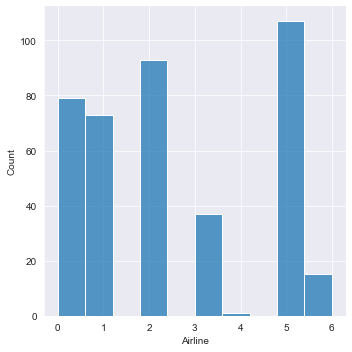

In [27]:
sns.displot(flights_2023_categorical["Airline"])

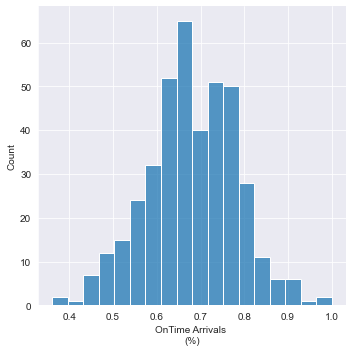

In [20]:
sns.displot(flights_2023_categorical["OnTime Arrivals \n(%)"])

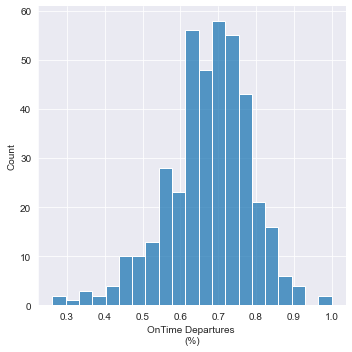

In [21]:
sns.displot(flights_2023_categorical["OnTime Departures \n(%)"])

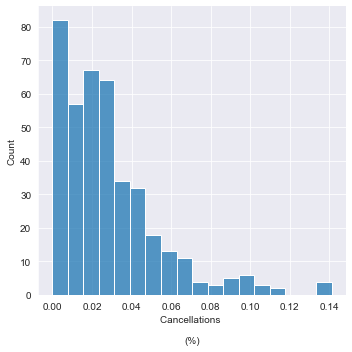

In [26]:
sns.displot(flights_2023_categorical["Cancellations \n\n(%)"])

## Multivariate Analysis

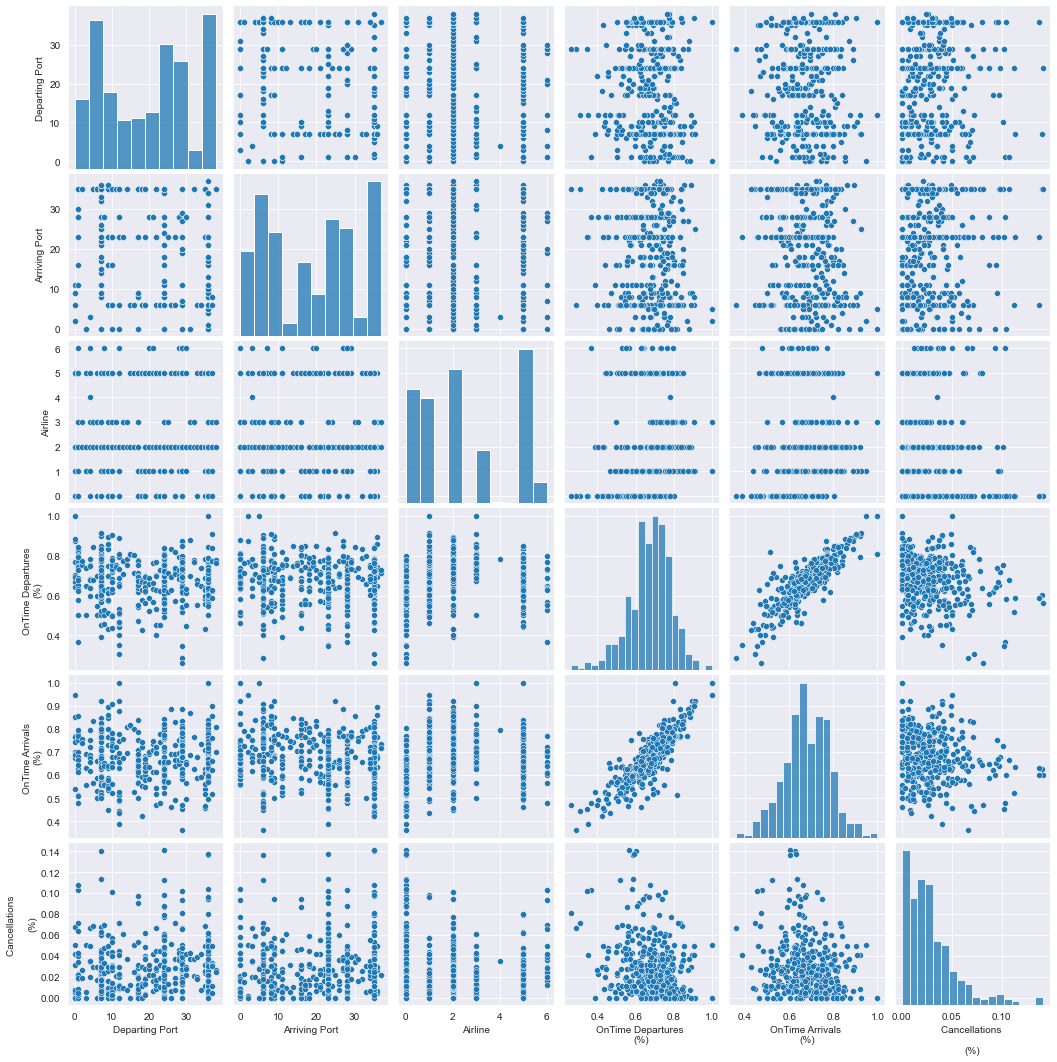

In [28]:
sns.pairplot(flights_2023_categorical)

# Train the model

In [33]:
flights_2023_categorical["Average On Time"] = ((flights_2023_categorical["OnTime Departures \n(%)"] + flights_2023_categorical["OnTime Arrivals \n(%)"]) * 0.5) - flights_2023_categorical["Cancellations \n\n(%)"]

In [34]:
flights_2023_categorical

,Departing Port,Arriving Port,Airline,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%),Average On Time
1,0,2,1,1.000000,0.947368,0.050000,0.923684
2,0,2,2,0.870588,0.768627,0.001957,0.817651
3,0,2,5,0.768707,0.700680,0.000000,0.734694
5,0,6,0,0.689751,0.673130,0.067183,0.614257
6,0,6,1,0.680761,0.765328,0.004211,0.718834
...,...,...,...,...,...,...,...
525,37,6,5,0.628906,0.663411,0.031526,0.614633
527,37,8,2,0.836440,0.858088,0.030321,0.816943
528,37,8,3,0.907514,0.901734,0.049451,0.855174
530,38,35,2,0.776852,0.808333,0.026150,0.766443


In [35]:
flights_2023_data = flights_2023_categorical[["Departing Port", "Arriving Port", "Airline", "Average On Time"]]

In [36]:
flights_2023_data

,Departing Port,Arriving Port,Airline,Average On Time
1,0,2,1,0.923684
2,0,2,2,0.817651
3,0,2,5,0.734694
5,0,6,0,0.614257
6,0,6,1,0.718834
...,...,...,...,...
525,37,6,5,0.614633
527,37,8,2,0.816943
528,37,8,3,0.855174
530,38,35,2,0.766443


# Train a Support Vector Machine on the data

## Split data into X (Independent Variable) and y (Dependent Variable)

In [40]:
X = flights_2023_data[["Departing Port", "Arriving Port", "Airline"]]
y = flights_2023_data["Average On Time"]

## Split data into training and test datasets

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Train the model using the 'train' data

In [49]:
from sklearn.svm import SVR

clf = SVR() # Classifier = new Support Vector Machine (Regression)

In [50]:
clf.fit(X_train, y_train)

SVR()

## Evaluate the model's performance

In [55]:
X_test

,Departing Port,Arriving Port,Airline
53,5,35,2
421,30,28,6
206,13,23,2
463,36,6,3
100,7,22,5
...,...,...,...
7,0,6,2
499,36,21,2
133,7,36,2
78,7,11,2


In [54]:
y_test

53     0.771991
421    0.517420
206    0.754805
463    0.750663
100    0.593522
         ...   
7      0.674940
499    0.680702
133    0.693450
78     0.457627
10     0.861792
Name: Average On Time, Length: 122, dtype: float64

In [53]:
y_test_pred = clf.predict(X_test)

In [58]:
y_test_pred

array([0.64017402, 0.69729417, 0.61925398, 0.68790789, 0.65390718,
       0.72678569, 0.63656096, 0.60952822, 0.59814867, 0.63053543,
       0.6398867 , 0.60097559, 0.61838823, 0.6928814 , 0.70079257,
       0.58869185, 0.66536232, 0.67449924, 0.70553558, 0.67195588,
       0.5976486 , 0.62656728, 0.6617601 , 0.71624334, 0.68815426,
       0.71488668, 0.72236997, 0.65676863, 0.67895653, 0.69937868,
       0.66076029, 0.68262375, 0.60594515, 0.65668213, 0.73145673,
       0.63556826, 0.64588319, 0.63232107, 0.666301  , 0.62013367,
       0.68715669, 0.74595686, 0.65083432, 0.63360451, 0.60971312,
       0.60377399, 0.67417861, 0.64902532, 0.70303227, 0.68274653,
       0.65520635, 0.66182986, 0.67366403, 0.59558345, 0.60146743,
       0.68738351, 0.72383558, 0.63160504, 0.61418486, 0.60847848,
       0.73991714, 0.68830754, 0.59435765, 0.64977729, 0.63602392,
       0.64423702, 0.59443296, 0.6310521 , 0.64385347, 0.64663268,
       0.70854891, 0.61050692, 0.63307725, 0.60052492, 0.63497

### Evaluate how accurate the model is by measuring the distance from its predicted Y values from the real Y values (groundtruth)

In [72]:
y_test - y_test_pred

53     0.131817
421   -0.179875
206    0.135551
463    0.062755
100   -0.060385
         ...   
7     -0.072741
499    0.053111
133    0.046079
78    -0.259370
10     0.116342
Name: Average On Time, Length: 122, dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error

In [63]:
print(mean_squared_error(y_test, y_test_pred))

0.011933803917080313
